<img src="./images/piconesGR_horizontal.png" alt="PyConES2022" style="width: 300px;"/>

Este [notebook](https://ipython.org/notebook.html) forma parte de una serie de notebooks que serán usados en la [PyConES 2022](https://2022.es.pycon.org/) por:
- [Pedro González Rodelas](https://www.ugr.es/~prodelas/), y
- [Francisco Miguel García Olmedo](https://www.ugr.es/~folmedo/) 

para un **Taller introductorio sobre los módulos fundamentales de Python para el cálculo científico**

# matplotlib - Gráficos 2D y 3D con Python

J.R. Johansson (jrjohansson at gmail.com); traducido por P. Gzlez. Rodelas (prodelas at gmail.com)

La última versión en inglés de este [IPython notebook](http://ipython.org/notebook.html) notebook está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

Otros notebooks de de esta misma serie se encuentran indexados en [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
# Esta línea configura matplotlib para poder mostrar figuras y gráficos embebidos en el notebook, 
# en vez de abrirlos en una nueva ventana para cada figura. 
# Si se está usando una versión anterior de IPython, intente usar más bien '%pylab inline'.
%matplotlib inline

## Introducción

Matplotlib es una excelente librería para generar figuras y gráficos científicos, tanto 2D como 3D. Algunas de las muchas ventajas de esta biblioteca incluyen:

* Facilidad de uso
* Soporte para textos y etiquetado en formato $\LaTeX$.
* Gran control de cada elemento de las figuras, incluyendo tamaño y resolución DPI ("dots per inch"). 
* Salidas de alta calidad en numerosos formatos, incluyendo PNG, PDF, SVG, EPS, y PGF.
* Interfaz gráfica (GUI) para la exploración interactiva de figuras *y* soporte para la generación automática de  ficheros gráficos (muy útil para trabajos en cadena, o por lotes).

Una de las características clave de matplotlib que habría que resaltar, y que pueden hacer matplotlib altamente recomendable para la generación de figurss para publicaciones científicas es el hecho de que practicamente todos los aspectos de dichas figuras pueden ser controlados *programmaticamente. Esto es de vital importancia para la tan deseada reproducibilidad y conveniente cuando uno necesita regenerar una cierta figura con una diferente apariencia o bien con datos actualizados. 

Más información al respecto puede obtnerse directamente en la página web oficial de Matplotlib: http://matplotlib.org/

Para comenzar a usar Matplotlib en un programa Python, puede incluir los símbolos necesarios a través del módulo `pylab`(que resulta ser la manera más sencilla):

In [2]:
from pylab import *

o bien puede importar el módulo `matplotlib.pyplot` bajo un cierto sobrenombre o abreviatura, como `plt` (que es la forma más limpia y ordenada de hacerlo):

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## Interfaz de programación de aplicaciones (API)  tipo MATLAB

La manera más fácil de comenzar a dibujar y generar gráficos usando matplotlib puede ser usar la API tipo MATLAB que viene con matplotlib. 

Se ha diseñado para ser compatible con los comandos de gráficos de MATLAB, de manera que resulte fácil comenzar a usarla si se es familiar con MATLAB.

Para poder usar esta API desde matplotlib, necesitaremos incluir los correspondientes "símbolos" del módulo `pylab`: 

In [5]:
from pylab import *

### Ejemplo

Una simple figura con la API de dibujo tipo MATLAB:

In [6]:
x = np.linspace(0, 5, 10)
y = x ** 2

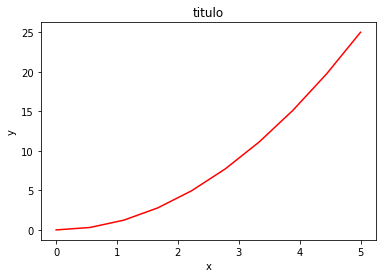

In [7]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('titulo')
show()

La mayor parte de funciones gráficas en MATLAB son cubiertas por otras equivalentes en el módulo `pylab`. Por ejemplo, 'subplot' y la selección del 'color' o 'symbol':

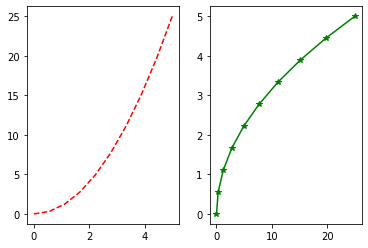

In [8]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

Lo mejor del estilo MATLAB de esta API del módulo pylab es la facilidad para comezar a usarla si ya se tiene cierta familiaridad con MATLAB, así como la mínima necesidad de código adicional para gráficos simples. No obstante, se recomienda el uso de esta API compatible con MATLAB sólo para estos casos.

En cualquier otra circunstancia, se recomienda más bien aprender y usar la API general de matplotlib orientada a objetos, ya que resulta mucho más potente. Por ejemplo resulta mucho más conveniente trabajar con esta última en caso de figuras más complejas, con subfiguras ('subplots' en inglés), añadidos ('insets' en inglés) y otros componentes varios. 

## El API orientado a objetos de matplotlib

La idea principal de la programación orientada a objetos es precisamente el tener determinados objectos a los que poder aplicar funciones y ciertas aciones específicas, y no de manera global (como en la API tipo MATLAB). La ventaja real de este enfoque resulta aparente cuando se genera más de una figura, o bien cuando una figura contiene más de un 'subplot'. 

Para usar esta API orientada a objetos empezaremos de manera muy parecida a como lo hicimos en el ejemplo previo, pero en vez de crear una nueva instancia  global del comando 'figure', lo que haremos será almacenar una referencia a la recién creada figura en la variable que denominaremos por ejemplo `fig`, y desde ésta crearemos también una nueva instancia de ejes (`axes`) usando el método `add_axes` en la instancia `fig` de la clase `Figure`:

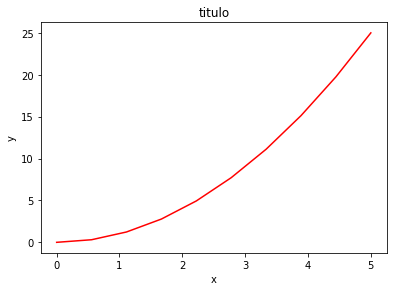

In [9]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
# izquierda, arriba, anchura, altura (en un rango de 0a 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('titulo');

Aunque se ha usado un poco más de código, la ventaja es que ahora tenemos un control absoluto sobre dónde serán situados los ejes, y también podremos añadir fácilmente más de un eje a la figura:

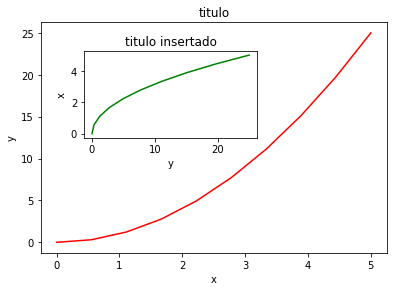

In [10]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # ejes principales
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # ejes añadidos

# figura principal
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('titulo')

# figura insertada
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('titulo insertado');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

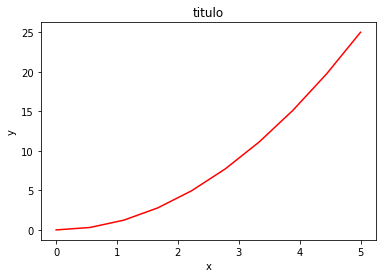

In [11]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('titulo');

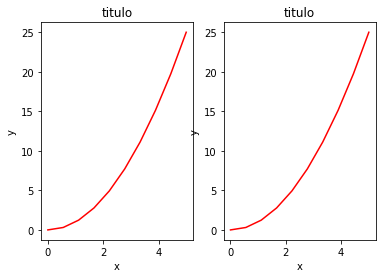

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('titulo')

Esto fué fácil, pero no resulta vistoso que se sobrepongan alguno de los ejes y las etiquetas.

Podemos solucionar esto usando el método `fig.tight_layout`, que ajusta de manera automática la posición de los ejes en el lienzo de la figura, de manera que no se sobreponga ningún contenido:

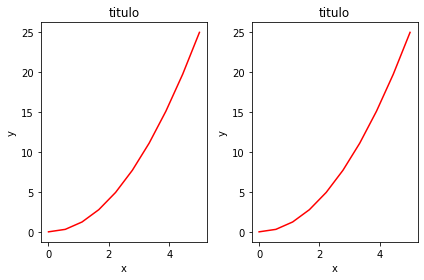

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('titulo')
    
fig.tight_layout()

### Tamaño, Escala y Resolución de la Figura 

Matplotlib permite especificar tanto el tamaño, la escala ('aspect ratio'), resolución (puntos por pulgada, o DPI en inglés) cuando se crea el objeto `Figure`, usando las palabras clave `figsize` y `dpi` como argumentos: `figsize` es una tupla indicando la anchra ('width' en inglés) y altura ('height' en inglés) de la figura en pulgadas ('inches' en inglés), mientras que `dpi` indica los puntos por pulgada ('dots or pixelx per inch' en inglés). Por ejemplo, para crear una figura de 800x400 pixels, con 100 puntos-por-pulgada, podremos indicar: 

In [14]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Los mismos argumentos pueden ser pasados a cualquier otro gestor de diseño ('layout managers' en inglés), como por ejemplo un `subplots`:

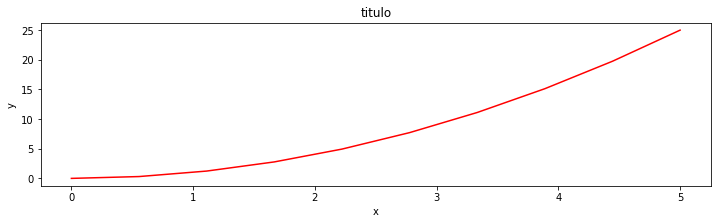

In [15]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('titulo');

### Guardando las figuras

Para grabar una figura en un fichero podemos usar el método `savefig` dentro de la clase `Figure`:

In [16]:
fig.savefig("filename.png")

Aquí también podemos opcionalmente especificar la resolución, así como elegir entre diferentes formatos:

In [17]:
fig.savefig("filename.png", dpi=200)

#### ¿Qué formatos están disponibles y cuáles deberían ser usados para una mejor calidad?

Matplotlib puede generar salida de alta calidad en bastantes formatos, incluyendo PNG, JPG, EPS, SVG, PGF y PDF. Para artículos científicos, se recomienda usar PDF siempre que sea posible, ya que en los documentos LaTeX compilados con `pdflatex` éstos pueden ser incluidos fácilmente usando el commando `includegraphics`). En otros casos, EPS o incluso PGF puedem ser también buenas alternativas.

In [18]:
fig.savefig("filename.pdf")

In [19]:
fig.savefig("filename.eps")

### Leyendas, etiquetas y títlulos

Ahora que hemos cubierto lo básico acerca de cómo crear un "lienzo" para dibujar un gráfico y añadir los ejes, veámos cómo  decorar dicha figura con títulos, etiquetas para los ejes, así como leyendas.

**Títulos de Figura**

Un título puede ser añadido a cada instancia de los ejes de una figura. Para poner un título, usa el método `set_title` en la correspondiente instancia de los ejes:

In [20]:
ax.set_title("titulo");

**Etiquetas de los ejes**

De manera similar, con los métodos `set_xlabel` y `set_ylabel`, también podremos fijar las correspondientes etiquetas de los ejes X e Y:

In [21]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Leyendas**

Leyendas para cada una de las curvas en una figura pueden ser añadidas de dos formas. Una sería usar el método `legend` del object 'axis' y pasarle una lista/tuple del texto de la leyenda para las curvas definidas previamente:

In [22]:
ax.legend(["curve1", "curve2", "curve3"]);

Los métodos descritos más arriba también se aplicarían a la API tipo MATLAB, pero en ésta resulta más inflexible y propensa a errores si ciertas curvas son añadidas o eliminadas de la figura (resultando irremediablemente con algunas curvas mal etiquetadas).


Una mejor manera sería usar la palabra clave `label="label text"` como argumento cuando ciertos gráfico o cualquier otro objeto sea añadido a la figura, y entonces usar el método `legend` sin argumentos para añadir la leyenda a la figura: 

In [23]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

La ventaja de este método es que si alguna curva es añadida o eliminada de la figura, entonces la leyenda sería actualizada de manera automática.

La función `legend` toma como un argumento opcional la palabra clave `loc` que puede ser usada para especificar donde deberá ser colocada la leyenda. Los valores permitidos para `loc` son  códigos numéricos para los distintos lugares posibles. Ver http://matplotlib.org/users/legend_guide.html#legend-location para más detalles. Alguno de los valores más comunes para `loc` son:

In [24]:
ax.legend(loc=0) # deja que matplotlib decida
ax.legend(loc=1) # esquina superior derecha
ax.legend(loc=2) # esquina superior izquierda
ax.legend(loc=3) # esquina inferior izquierda
ax.legend(loc=4) # esquina inferior derecha
# .. muchas más opciones son posibles

La siguiente figura muestra como poner el título, etiquetas de los ejes y leyendas descritas más arriba:

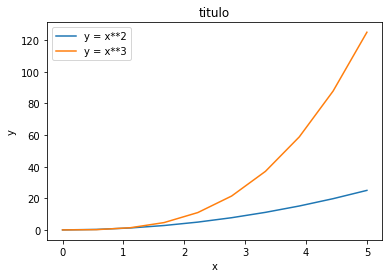

In [25]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # esquina superior izquierda
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('titulo');

### Formateando el texto: LaTeX, tamaño y tipo de letra

La figura anterior es funcional, pero todavía no satisface los criteros más exigentes exigidos a una figura usada en una publicación científica. En primer lugar y lo más importante, a menudo necesitamos incluir texto en formato LaTeX, y en segundo lugar, necesitaremos ser capaces de ajustar el tamaño y la fuente o tipo de letra que aparecerá finalmente en la publicación.

Matplotlib posee un extenso soporte para el uso de LaTeX dentro de nuestras figuras. Todo lo que necesitamos es usar los signos de dólar para encapsular código LaTeX en cualquier parte de un texto (leyenda, título, etiqueta, etc.). Por ejemplo, `"$y=x^3$"`.

Pero aquí también podríamos sufrir de ligeros problemas al combinar código LaTeX con cadenas de texto ('strings') de Python. En LaTeX, usamos frecuentemente la barra invertida ('\',  "backslash" en inglés) en comandos (como por ejemplo `\alpha` para producir el símbolo $\alpha$). Pero '\' ya tiene un significado concreto para "strings" en Python (se trata del código correspondiente al caracter "Escape"). Así pues, para evitar que Python estropee nuestro código LaTeX, necesitaremos usar cadenas de texto sin procesar ("raw text" en inglés);   precedidas por ejemplo con una '`r`', como en `r"\alpha"` o `r'\alpha'` en vez de `"\alpha"` o `'\alpha'`:

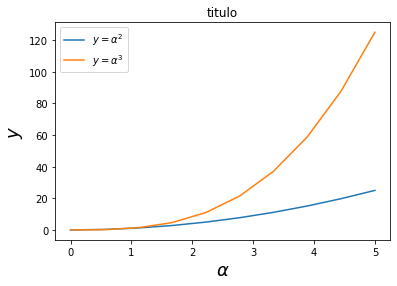

In [26]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # esquina superior izquierda
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('titulo');

También podemos cambiar el tamaño global, o el tipo de letra, que se aplicará a todo los elementos de texto en una figura (etiquetas de marcado, de ejes, títulos, leyendas, etc.):

In [27]:
# Para actualizar los parámetros de configuración de matplotlib:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

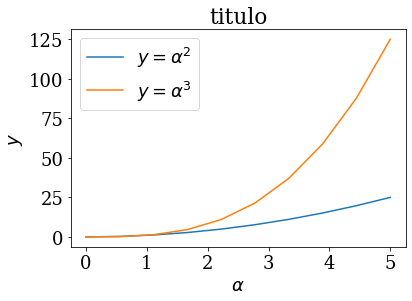

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # esquina superior izquierda
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('titulo');

Una buena elección global para el tipo de letra podría ser la fuente STIX: 

In [29]:
# Para actualizar los parámetros de configuración de matplotlib:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

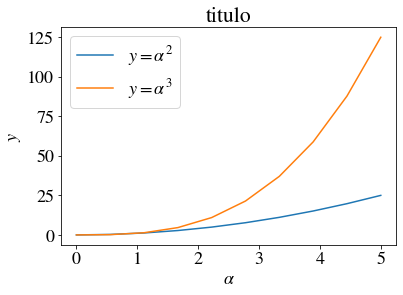

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # esquina superior izquierda
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('titulo');

Alternativamente, podemos requerir que matplotlib use LaTeX para mostrarnos los elementos de texto en la figura:

In [31]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

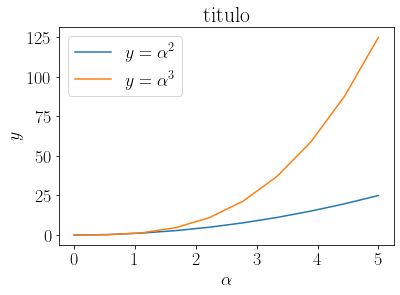

In [32]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # esquina superior izquierda
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('titulo');

In [33]:
# Para restaurar la fuente habitual por defecto
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Fijando los colores, tipo y grosor de las líneas

#### Colores

Con matplotlib podemos definir los colores de lineas y otros muchos elementos gráficos de distintas maneras. En primer lugar, podemos usa una sintaxis tipo MATLAB, donde `'b'` significa azul ("blue" en inglés), `'g'` significa verde ("green" en inglés), etc. La API tipo MATLAB para selecionar los estilos de línea también son soportados: donde por ejemplo, 'b.-' significa una línea azul con puntos:

In [34]:
# Indicando color y tipo de línea al estilo MATLAB 
ax.plot(x, x**2, 'b.-') # línea azul con puntos
ax.plot(x, x**3, 'g--') # línea verde punteada

También podemos definir colores a partir de sus nombres o códigos RGB hexadecimales; opcionalmente también podemos proporcionar un valor "alpha" usando las palabras clave `color` y `alpha` como argumentos:

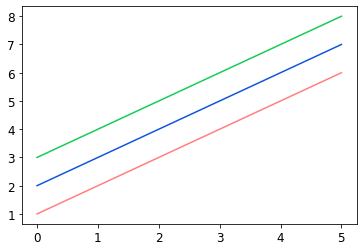

In [35]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # media-transparencia roja
ax.plot(x, x+2, color="#1155dd")        # código hexadecimal RGB para un color azulado
ax.plot(x, x+3, color="#15cc55")        # código hexadecimal RGB para un color verdoso

#### Estilos de Línea y marcadores

Para cambiar el grosor de línea, podemos usar la palabra clave `linewidth` o `lw` como argumento. A su vez, el estilo de línea tamién puede ser selecionado usando las palabras clave `linestyle` o `ls` como argumento:

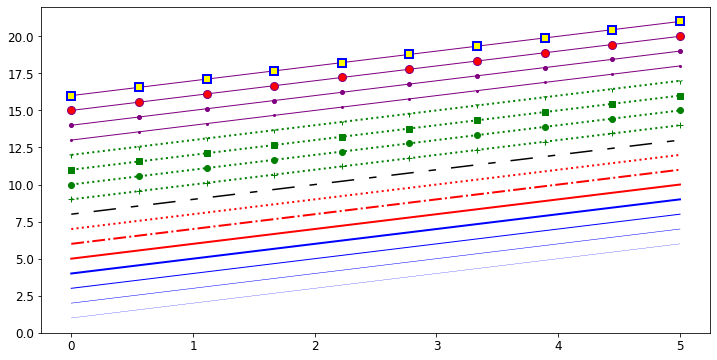

In [36]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# posibles opciones de tipos de línea ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# líneas discontínuas
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) 
# formato: longitud de línea, spaciado, ...

# posibles símbolos de marcación: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls=':', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls=':', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls=':', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls=':', marker='1')

# tamaño y color de los marcadores
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control sobre la apariencia de los ejes

La apariencia de los ejes es un aspecto muy importante de una figura, de manera que necesitaremos modificarlo para obtener un gráfico de calidad para una publicación. Por ello a menudo necesitaremos tener bastante control sobre donde se situarán las marcas y etiquetas, modificar el tipo de letra y etiquetado de los ejes, etc. En esta sección repasaremos la posibilidad de controlar estas propiedades en una figura con matplotlib.

#### Rango del gráfico ('Plot range')

La primera cosa que posiblemente queramos configurar es el rango de los ejes. Podemos controlar esto con los métodos `set_ylim` y `set_xlim` en el objeto 'axis', aunque también podríamos usar simplemente `axis('tight')` para que se obtengan de manera automática unos rangos "ajustados":

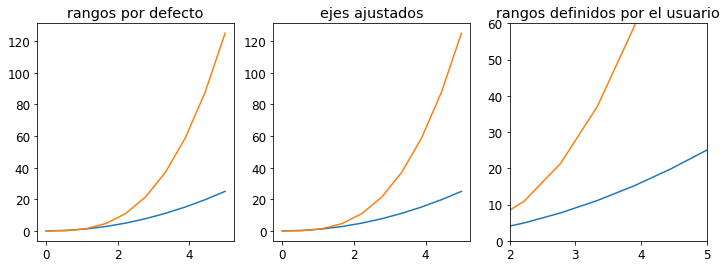

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("rangos por defecto")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("ejes ajustados")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("rangos definidos por el usuario");

####  Escala logarítmica

También es posible fijar una escala logarítmica para uno o ambos ejes. Esta funcionalidad es de hecho sólo una aplicación concreta de un sistema de trasformación más general en Matplotlib. De hecho se podría fijar la escala de cada uno de los ejes usando los métodos `set_xscale` y `set_yscale` que aceptarán un parámetro (con el valor "log" en este caso):

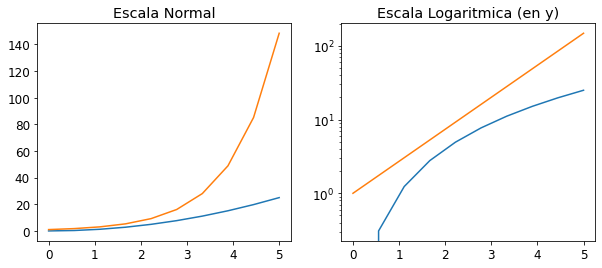

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Escala Normal")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Escala Logaritmica (en y)");

### Emplazamiento customizado de las marcas  y etiquetas ("labels" y "ticks" en inglés)

Podemos determinar explícitamente dónde queremos las marcas de los ejes con  `set_xticks` y `set_yticks`. Ambos toman una lista de valores de donde se van a colocar las marcas de los ejes. También podemos usar los métodos `set_xticklabels` y `set_yticklabels` para proporcionar una lista de etiquetas de texto personalizados para cada marca localizada:

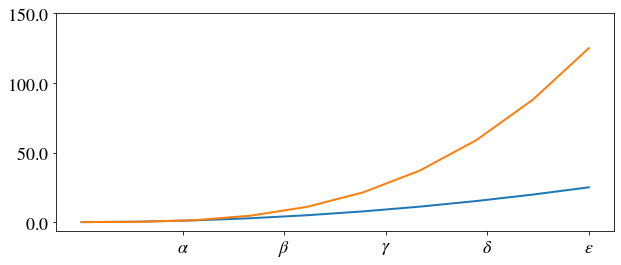

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); 
# usaremos etiquetas formateadas con LaTeX

Existe también un gran número de métodos avanzados para controlar el más mínimo emplazamiento de marcas en figuras matplotlib, así como la posibilidad de emplazamiento automático de acuerdo con ciertas normas e indicaciones. Consultar http://matplotlib.org/api/ticker_api.html para más detalles.

#### Notación científica

En muchos casos, es mejor usar notación científica:

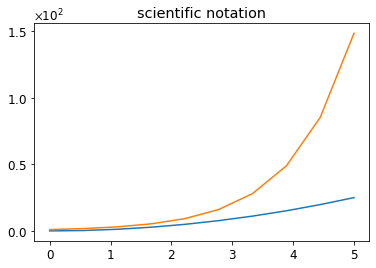

In [40]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Axis number and axis label spacing

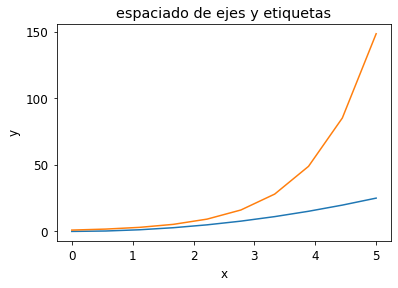

In [41]:
# distancia entre los ejes x e y, así como los marcas colocadas sobre ellos
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("espaciado de ejes y etiquetas")

# padding entre la etiqueta de los ejes y los números de los ejes
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [42]:
# restaurando las opciones por defecto
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Ajuste del posicionamiento de los ejes

Desafortunadamente, cuando se graban las figuras, las etiquetas resultan a menudo "clipped", y puede resultar necesario ajustar la posición de los ejes un poco más. Esto puede hacerse usando `subplots_adjust`:

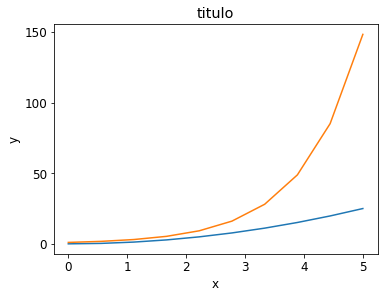

In [43]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("titulo")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Cuadrícula de los ejes

Con el método `grid` en el objeto 'axis', podemos activar ('on') o desactivar ('off') las líneas de la cuadrícula. También podemos personalizar la apariencia de estas líneas de la cuadrícula usando como argumento las mismas palabras clave que con la función `plot`:

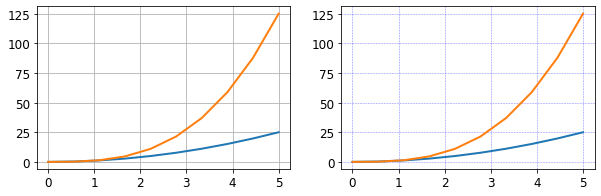

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# apariencia de cuadrícula por defecto
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# apariencia de cuadrícula personalizada
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

También podremos cambiar las propiedades de los axis spines:

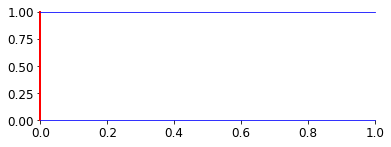

In [45]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# quitando el "spine" de la derecha
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # sólo marcas en el lado izquierdo

### Ejes gemelos

A veces es útil tener ejes duales en la variable x o en la y en una figura; por ejemplo, cuando se dibujan conjuntamente curvas con diferentes unidades. Matplotlib soporta esto con las funciones `twinx` y `twiny`:

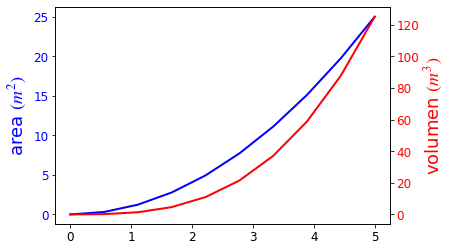

In [46]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volumen $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Ejes donde x e y son cero

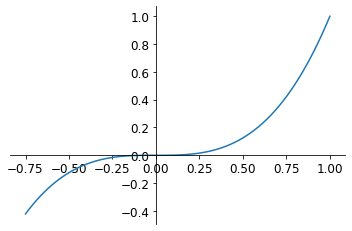

In [47]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) 
# fija la posición del origen en x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   
# fija la posición del origen en y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Otros estilos de gráficos 2D

Aparte de los métodos regulares de `plot`, también hay otras funciones para generar diferentes tipos de gráficos. Consultar la galería de matplotlib para una lista completa de tipos de gráfica disponibles: http://matplotlib.org/gallery.html. Algunos de los más útiles se muestran más abajo:

In [48]:
n = np.array([0,1,2,3,4,5])

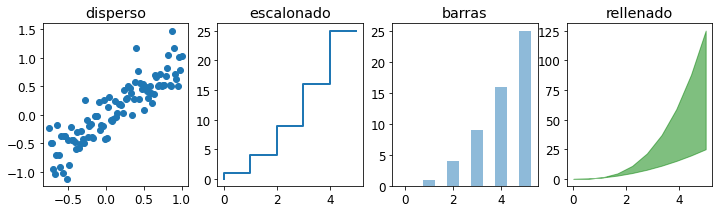

In [49]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("disperso")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("escalonado")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("barras")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("rellenado");

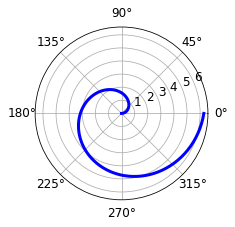

In [50]:
# gráfico en polares usando add_axes y proyección polar
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

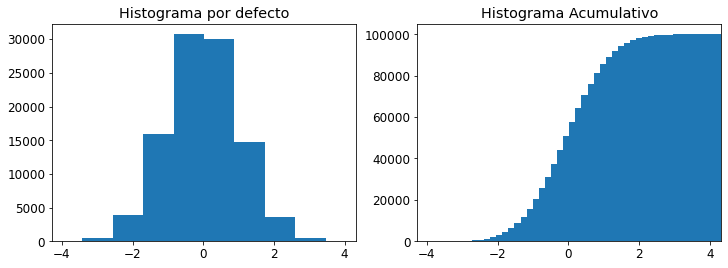

In [51]:
# Un histograma
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Histograma por defecto")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Histograma Acumulativo")
axes[1].set_xlim((min(n), max(n)));

### Inserción de texto

Insertar texto en figuras de matplotlib puede hacerse usando la función `text`. Soporta el formato LaTeX, justo como los títulos y las etiquetas de los ejes:

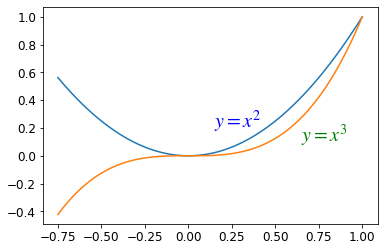

In [52]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figuras con multiples subfiguras  e insertados ('insets')

Los ejes pueden añadirse a un lienzo de figura matplotlib de manera manual usando `fig.add_axes` o usando un gestor de edición de sub-figures como `subplots`, `subplot2grid`, o `gridspec`:

#### subfiguras ('subplots')

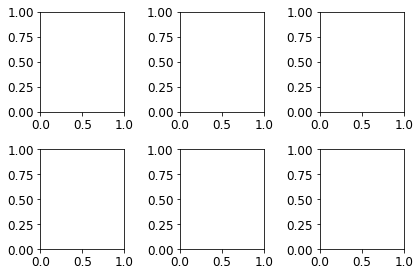

In [53]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

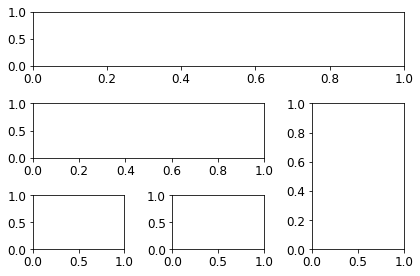

In [54]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [55]:
import matplotlib.gridspec as gridspec

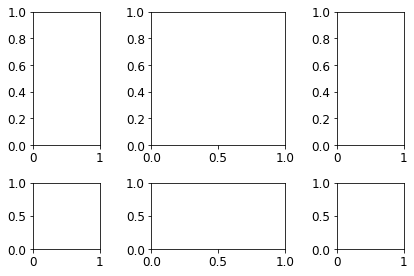

In [56]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### añadiendo ejes ('add_axes')

Podemos añadir ejes de forma manual con `add_axes` resultando útil para realizar añadidos a las figuras:

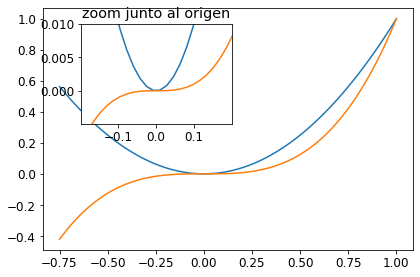

In [57]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inserción
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, anchura, altura

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom junto al origen')

# fijando el rango de los ejes
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# fijando la localización de las marcas de los ejes
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Figuras de Color y con líneas de nivel

Figuras de Color y con líneas de nivel resultan útiles para dibujar funciones de dos variables. En la mayoría de estos casos podemos usar un gráfico de color para codificar ("encode" en inglés) una dimensión de los datos. Hay cierto número de gráficos de color predefinidos. No obstante, también es relativamente fácil definir gráficos de color personalizados. Para una lista de gráficos de color predefinidos ver: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [58]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [59]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

C:\Users\UX363\AppData\Local\Temp/ipykernel_30868/2820919165.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())


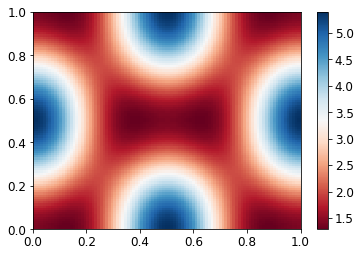

In [60]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

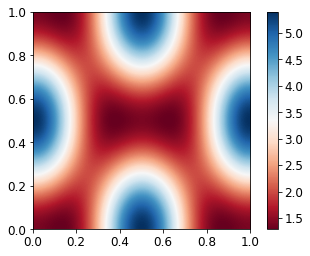

In [61]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

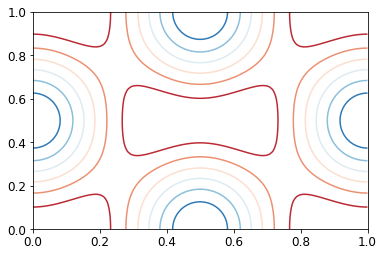

In [62]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## figuras 3D

Para usar gráficos 3D en matplotlib, primero necesitamos crear una instancia de la clase `Axes3D`. Los ejes 3D pueden añadirse a figuras de matplotlib exactamente de la misma manera que con los ejes 2D; o, más convenientemente, pasando la palabra clave `projection='3d'` como argumento a los métodos `add_axes` o `add_subplot`.

In [63]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Gráficas de superficies 3D

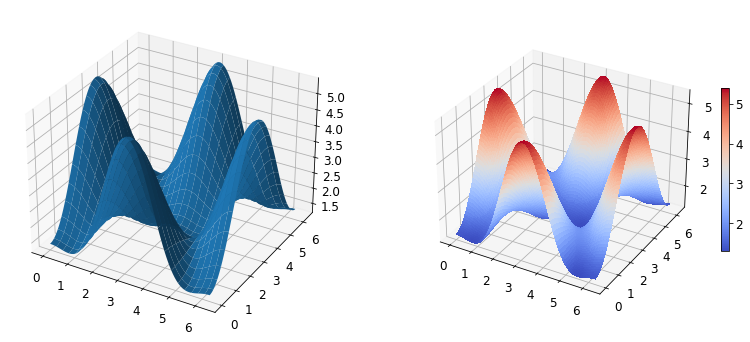

In [64]:
fig = plt.figure(figsize=(14,6))

# `ax` es una instancia de los ejes 3D ya que la palabra clave proyection='3d' 
# como argumento de add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# superficie con degradado de color y barra de colores
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Gráficas con estructura ("Wire-frame plot")

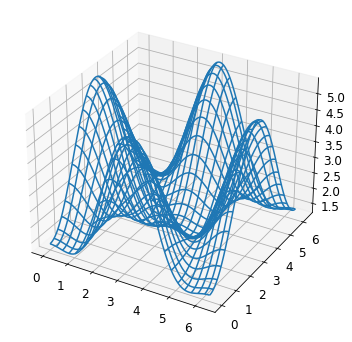

In [65]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Gráficos de nivel con proyecciones

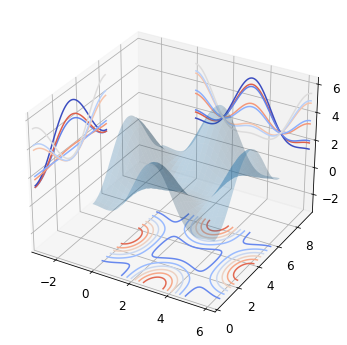

In [66]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Cambiando el punto de  vista

Podemos cambiar la perspectiva de un gráfico 3D usando el método `view_init`, que toma dos argumentos: `elevation` y ángulo `azimuth` (en grados):

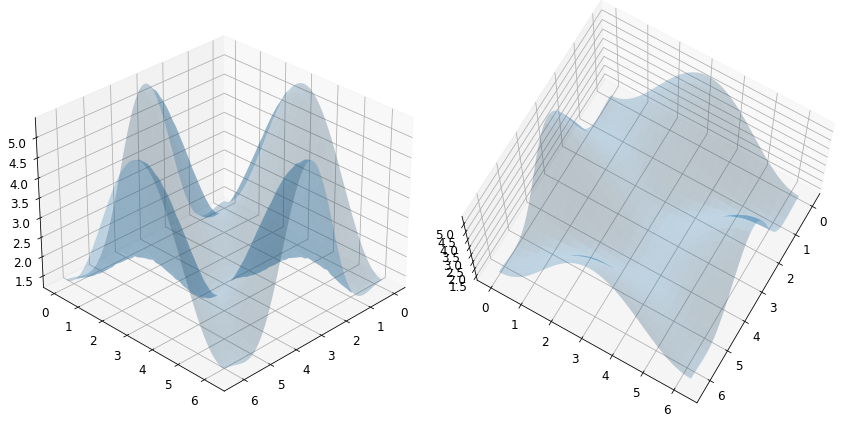

In [67]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

### Animaciones

Matplotlib también incluye una API bastante simple para generar animaciones de secuencias de figuras. Con la función `FuncAnimation` podemos generar un fichero de vídeo a partir de secuencias de figuras. La función toma los siguientes argumentos: `fig`, un lienzo de figura, `func`, y una función que proporciona una actualización de la figura, `init_func`, una función que configura la propia figura, `frame`, el número de frames a generar, y `blit`, que le dice a la animación que actualice sólo partes de los frames que han cambiado (para animaciones suaves):

    def init():
        # setup figure

    def update(frame_counter):
        # update figure for new frame

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

    anim.save('animation.mp4', fps=30) # fps = frames per second

Para usar la capacidad de animación en matplotlib antes necesitamos importar el módulo `matplotlib.animation`:

    from matplotlib import animation

Nota: Finalmente, para poder generar el fichero con la animación necesitaremos tener instalados `ffmpeg` o bien `avconv`. En Ubuntu podremos instalar la primera usando:

    $ sudo apt-get install ffmpeg

o bien (en las nuevas versiones)

    $ sudo apt-get install libav-tools

En MacOSX, intentar: 

    $ sudo port install ffmpeg

Pero ejemplos de todo esto los veremos con más detenimiento en otro notebook de este mismo Taller, dedicado al módulo de cálculo científico por antonomasia en Python: [SciPy](https://scipy.org/).

### Backends

Matplotlib posee cierto número de "backends" que son responsablee del renderizado gráfico. Estos diferentes backends son capaces de generar gráficos con diferentes formatos y mostrar bucles/ciclos de imágenes. No obstante, hay una distinción entre backends no-interactivos (como 'agg', 'svg', 'pdf', etc.) que tan sólo pueden usarse para generar ficheros de imágenes (e.g. con la función `savefig`), y backends interactivos (como Qt4Agg, GTK, MaxOSX) que pueden mostrar una ventana GUI para explorar figuras interactivamente. 

Una lista de backends disponibles son:

In [68]:
print(matplotlib.rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


El backend por defecto, llamado `agg`, es basado sobre una biblioteca para gráficos raster que resulta perfecta para generar gráficos en formato raster como PNG.

Normalmente no necesitaremos preocuparnos en cambiar el backend por defecto; pero algunas veces puede resultar útil cambiarlo, por ejemplo a formato PDF o GTKCairo (si se está usando Linux) para producir gráficos vectoriales de alta calidad en vez de simples gráficos basados en la técnica raster.

#### Generando gráficos SVG con el backend svg 

In [69]:
#
#  REARRANCAR EL NÚCLEO DEL NOTEBOOK: 
# ¡el backend de matplotlib sólo puede ser seleccionado 
# antes de que 'pylab' sea importado!
# (e.g. Kernel > Restart)
# 
import matplotlib
matplotlib.use('svg')
import matplotlib.pylab as plt
import numpy
from IPython.display import Image, SVG

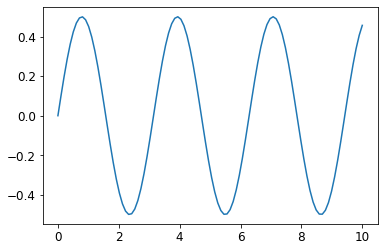

In [70]:
#
# Ahora estamos usando el backend de svg para producir gráficos vectoriales SVG
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

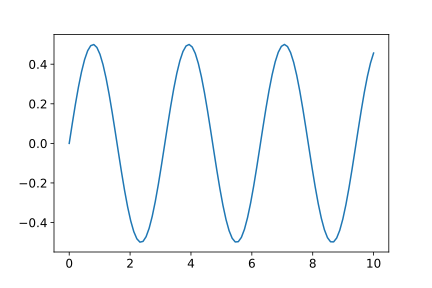

In [71]:
#
# A continuación mostramos el fichero SVG producido. 
#
SVG(filename="test.svg")

#### El backend en línea del  IPython notebook 

Cuando usamos un notebook de IPython es conveniente usar un backend de matplotlib que pueda sacar los gráficos embebidod dentro del notebook. Para activar este backend, en algún lugar del comienzo del notebook, añadiremos:

    %matplotlib inline

También es posible activar gráficos de matplotlib en línea con:

    %pylab inline

La diferencia es que `%pylab inline` importa un cierto número de paquetes en el espacio global de trabajo (scipy, numpy), mientras que `%matplotlib inline` sólo activa el dibujo en línea. En notebooks nuevos creados para versiones de IPython 1.0+, sería recomendable usar `%matplotlib inline`, ya que es "tidier" y se puedetener un mayor control sobre qué paquetes se importan y cómo. Comunmente, 'scipy' y 'numpy' se suelen importar separadamente con:

    import numpy as np
    import scipy as sp
    import matplotlib.pyplot as plt

El backend en línea tiene cierto número de opciones de configuración que pueden ser fijadas usando el comando mágido de IPython `%config` con el objeto de actualizar los settings en `InlineBackend`. Por ejemplo, podemos cambiar a figuras SVG o bien considerar figuras de mayor resolución con cualquiera de las sentencias:

    %config InlineBackend.figure_format='svg'
     
o:

    %config InlineBackend.figure_format='retina'
    
Para más información, escriba:

    %config InlineBackend

In [72]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib.pylab as plt
import numpy

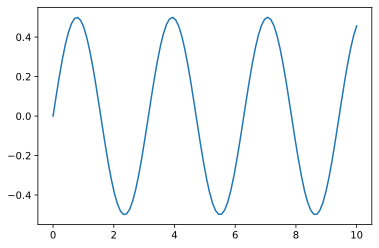

In [73]:
#
# Ahora estamos usando los gráficos vectoriales SVG en línea en el notebook
#
fig, ax = plt.subplots()
t = numpy.linspace(0, 10, 100)
ax.plot(t, numpy.cos(t)*numpy.sin(t))
plt.savefig("test.svg")

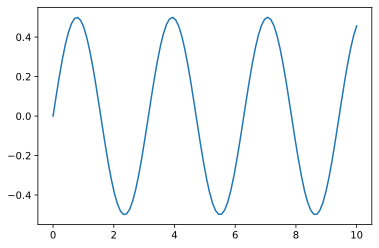

In [74]:
# Ahora, abrimos una ventana de gráficos interactiva con el backend Qt4Agg 
fig, ax = plt.subplots()
t = np.linspace(0, 10, 100)
ax.plot(t, np.cos(t) * np.sin(t))
plt.show()

Nótese que cuando usamos un backend interactivo, debemos llamar a `plt.show()` para hacer aparecer a la figura en la pantalla.

## Lecturas adicionales recomendadas

* http://www.matplotlib.org - La página web del proyecto matplotlib.
* https://github.com/matplotlib/matplotlib - El código fuente de matplotlib.
* http://matplotlib.org/gallery.html - Una extensa galeria que muestra varios tipos de gráficos creados con matplotlib. ¡Muy recomendable! 
* http://www.loria.fr/~rougier/teaching/matplotlib - Un buen tutorial de matplotlib.


## Versiones

In [75]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib

Software versions
Python 3.9.7 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.29.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.3
scipy 1.7.1
matplotlib 3.4.3
Wed Sep 28 13:13:34 2022 Hora de verano romance